In [22]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import glob
from collections import defaultdict

In [23]:
# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

import seaborn as sns

sns.set(font_scale=2)
sns.set_style("ticks")

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "14"
plt.rcParams["legend.title_fontsize"] = "14"
# Uncomment for local development
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [24]:
def get_data(files, *keys):
    """Get data keys from saved digit exps."""
    data = defaultdict(list)
    for f in files:
        d = torch.load(f)
        for k in keys:
            data[k].append(d[k])

    return data

<IPython.core.display.Javascript object>

In [25]:
def load_fashion_online_exps():
    # Get
    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/fashion_exp1*")
    exp1 = get_data(files, "correct")

    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/fashion_exp2_*")
    exp2 = get_data(files, "correct")

    # Gather
    models = [exp1, exp2]
    model_names = ["Astrocytes", "Neurons"]

    # Sanity
    assert len(model_names) == len(models)

    return model_names, models


def load_fashion_rand_exps():
    # Sparse projection
    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/fashion_exp3_*")
    exp3 = get_data(files, "correct")

    files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/fashion_exp4_*")
    exp4 = get_data(files, "correct")

    # Gather
    models = [exp3, exp4]
    model_names = ["Astrocytes", "Neurons"]

    # Sanity
    assert len(model_names) == len(models)

    return model_names, models

<IPython.core.display.Javascript object>

# Learn VAE 

In [26]:
model_names, models = load_fashion_online_exps()
# Show example
i = 0
model_names[i], models[i]

('Astrocytes',
 defaultdict(list,
             {'correct': [0.1135,
               0.1135,
               0.7609,
               0.8736,
               0.8481,
               0.8631,
               0.8121,
               0.8173,
               0.1135,
               0.8828,
               0.7738,
               0.867,
               0.8121,
               0.8399,
               0.88,
               0.8454,
               0.1135,
               0.8401,
               0.1135,
               0.8103]}))

<IPython.core.display.Javascript object>

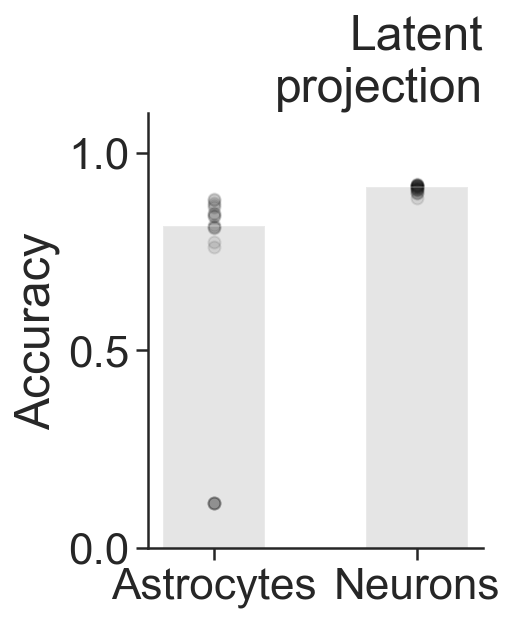

<IPython.core.display.Javascript object>

In [27]:
# Est
means = [np.mean(exp["correct"]) for exp in models]
stds = [np.std(exp["correct"]) for exp in models]
medians = [np.median(exp["correct"]) for exp in models]
assert len(means) == len(models)

# Plot grid
fig = plt.figure(figsize=(3, 4))
grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)
plt.subplot(grid[0, 0])

# Mean
plt.bar(model_names, medians, color="grey", alpha=0.2, width=0.5)

# Points
for name, model in zip(model_names, models):
    n = len(model["correct"])
    plt.scatter(x=np.repeat(name, n), y=model["correct"], color="black", alpha=0.1)

# Axes
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.title("Latent\nprojection", loc="right")
_ = sns.despine()

In [28]:
print(medians)
print(f"Astrocyte percent diff: {(medians[1] - medians[0])/ medians[0]}")

[0.8147, 0.91235]
Astrocyte percent diff: 0.11986007119184978


<IPython.core.display.Javascript object>

# Sparse projection

In [29]:
model_names, models = load_fashion_rand_exps()
# Show example
i = 0
model_names[i], models[i]

('Astrocytes',
 defaultdict(list,
             {'correct': [0.7112,
               0.7133,
               0.6708,
               0.6727,
               0.7077,
               0.6692,
               0.7074,
               0.7029,
               0.6926,
               0.6447,
               0.7003,
               0.7057,
               0.6996,
               0.6488,
               0.7073,
               0.696,
               0.6679,
               0.6942,
               0.6988,
               0.5925]}))

<IPython.core.display.Javascript object>

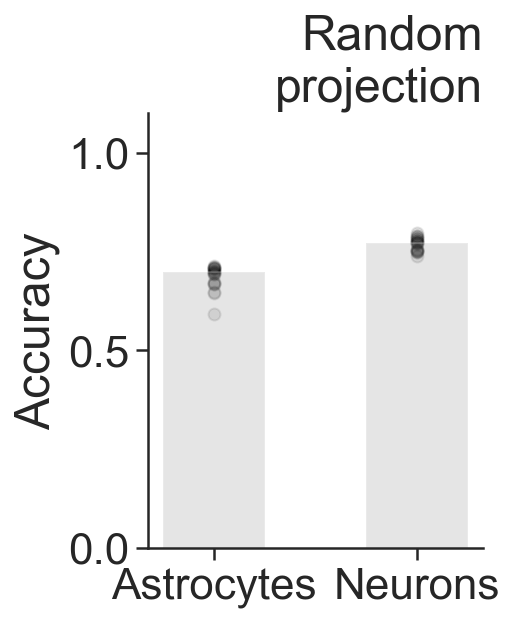

<IPython.core.display.Javascript object>

In [30]:
# Est
means = [np.mean(exp["correct"]) for exp in models]
stds = [np.std(exp["correct"]) for exp in models]
medians = [np.median(exp["correct"]) for exp in models]
assert len(means) == len(models)

# Plot grid
fig = plt.figure(figsize=(3, 4))
grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)
plt.subplot(grid[0, 0])

# Mean
plt.bar(model_names, medians, color="grey", alpha=0.2, width=0.5)

# Points
for name, model in zip(model_names, models):
    n = len(model["correct"])
    plt.scatter(x=np.repeat(name, n), y=model["correct"], color="black", alpha=0.1)

# Axes
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.title("Random\nprojection", loc="right")
_ = sns.despine()

In [31]:
print(medians)
print(f"Astrocyte percent diff: {(medians[1] - medians[0])/ medians[0]}")

[0.6974, 0.7726999999999999]
Astrocyte percent diff: 0.10797246917120723


<IPython.core.display.Javascript object>